# Visualizing activity for sub-reddits for each day of the month
Within this notebook we will be visualizing the activity for each sub-reddit for each day of the month. This dataset contains every publicly available Reddit comment for the month of May, 2015.

## Load the data

In [17]:
from pyspark.sql import SparkSession

hdfs_path = "hdfs://namenode:9000/user/spark/reddit_comments/"
spark_master = "spark://spark-master:7077"

spark = (
    SparkSession.builder.master(spark_master)
    .appName("Subreddit popularity analysis")
    .getOrCreate()
)

df = (
        spark.read.format("parquet")
        .option("header", "true")
        .load(hdfs_path)
    )

df_copy = df

df_copy = df_copy.withColumn("created_utc", df_copy["created_utc"].cast("timestamp"))
df_copy = df_copy.withColumn("day", df_copy["created_utc"].substr(9, 2))

df_copy = df_copy[['subreddit', 'day']]
df_copy.show(5)

+----------+---+
| subreddit|day|
+----------+---+
|       nba| 01|
|  politics| 01|
| AskReddit| 01|
| AskReddit| 01|
|bloodborne| 01|
+----------+---+
only showing top 5 rows



### Group counts of subreddits for each day of the month

In [18]:
df_copy = df_copy.groupBy('subreddit', 'day').count()
df_copy.show(10)

+--------------------+---+-----+
|           subreddit|day|count|
+--------------------+---+-----+
|        Christianity| 01| 2026|
|               books| 01| 2813|
|            skrillex| 01|  167|
|        nsfwhardcore| 01|   70|
|footballmanagergames| 01|  218|
|         yesyesyesno| 01|   22|
|           santacruz| 01|   12|
|          Pmsforsale| 01|   34|
|           derompope| 01|    1|
|           cardistry| 01|   31|
+--------------------+---+-----+
only showing top 10 rows



Order occurrences of sub-reddits by the number of comments for each day of the month.

In [19]:
df_copy = df_copy.orderBy(df_copy['count'].desc())
df_copy.show(10)

+---------+---+------+
|subreddit|day| count|
+---------+---+------+
|AskReddit| 29|150938|
|AskReddit| 28|147438|
|AskReddit| 06|139571|
|AskReddit| 22|130013|
|AskReddit| 26|127235|
|AskReddit| 13|126867|
|AskReddit| 21|123401|
|AskReddit| 20|120372|
|AskReddit| 07|118659|
|AskReddit| 05|117566|
+---------+---+------+
only showing top 10 rows



### Visualize the data

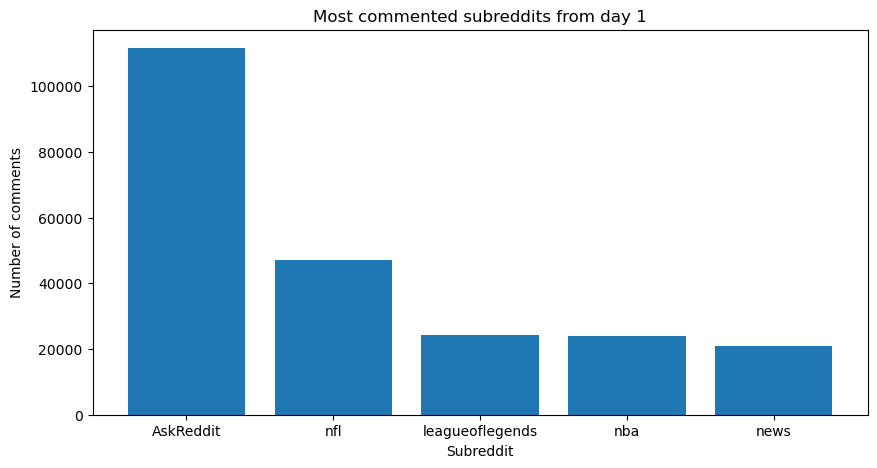

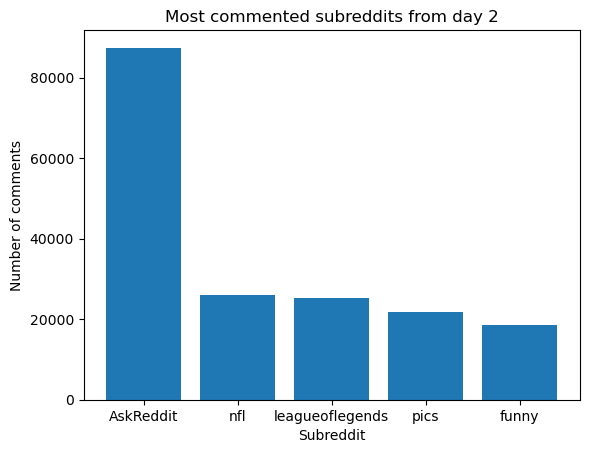

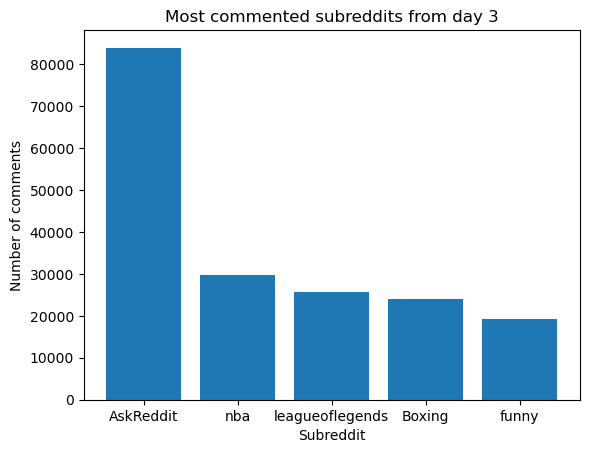

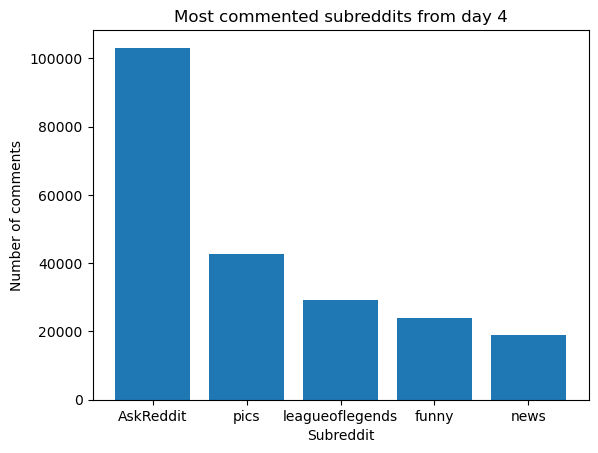

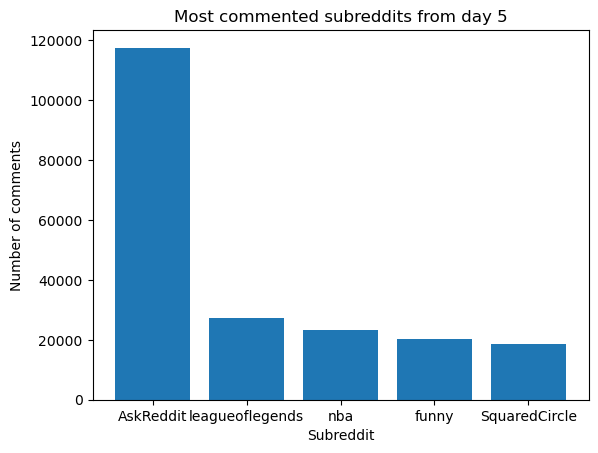

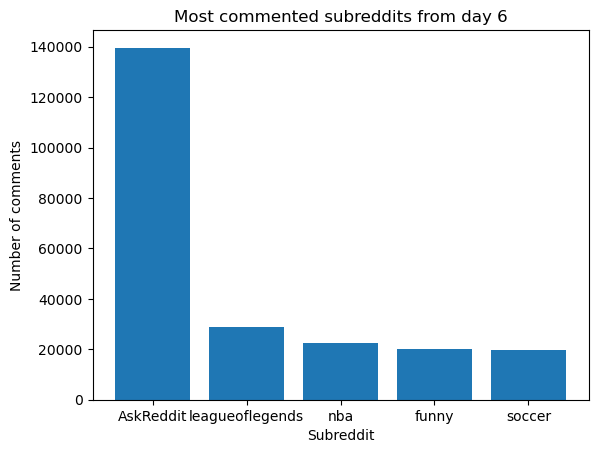

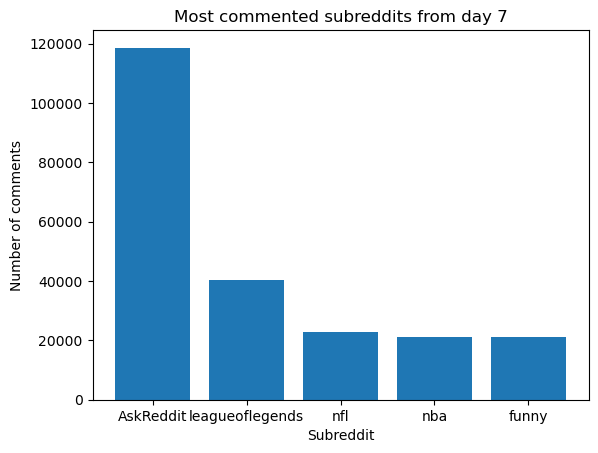

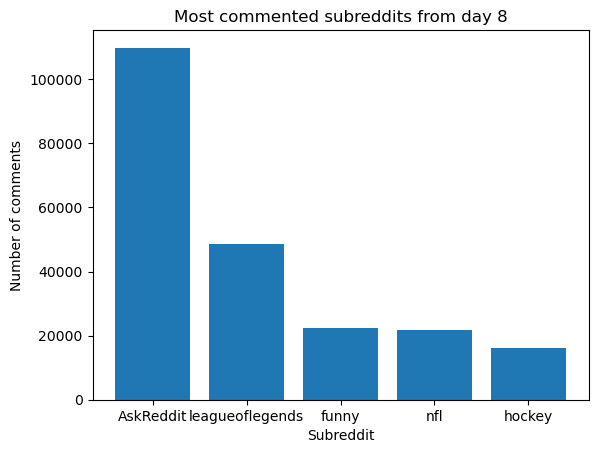

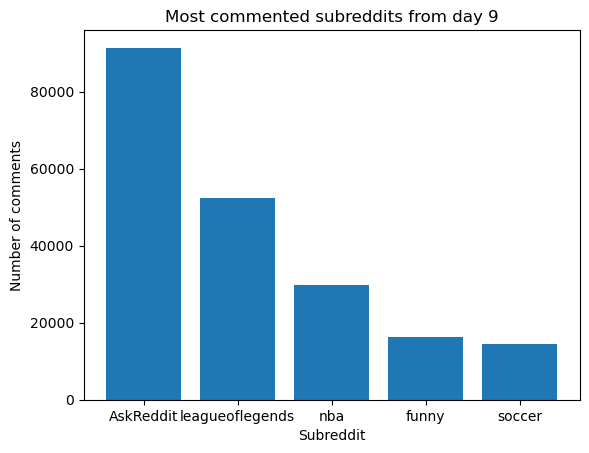

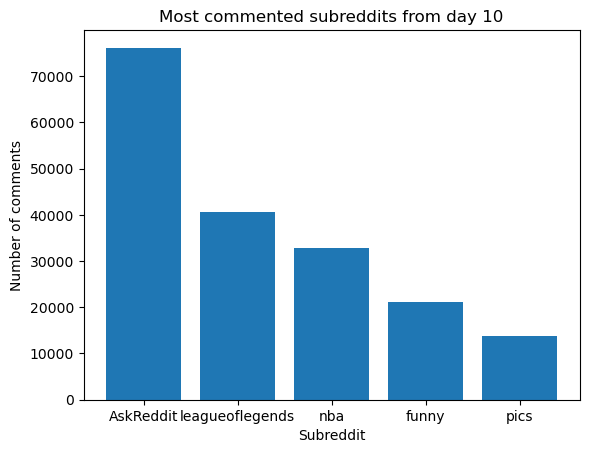

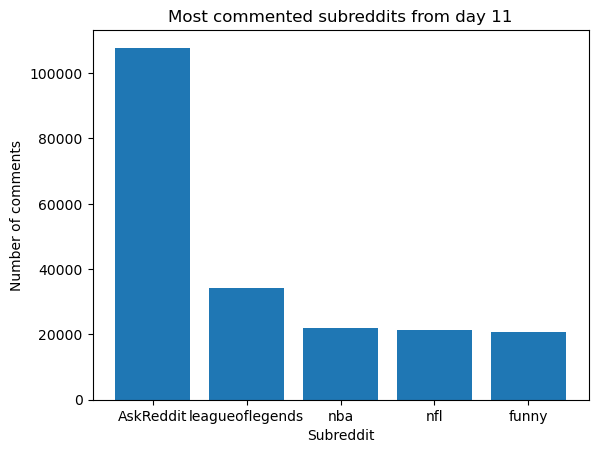

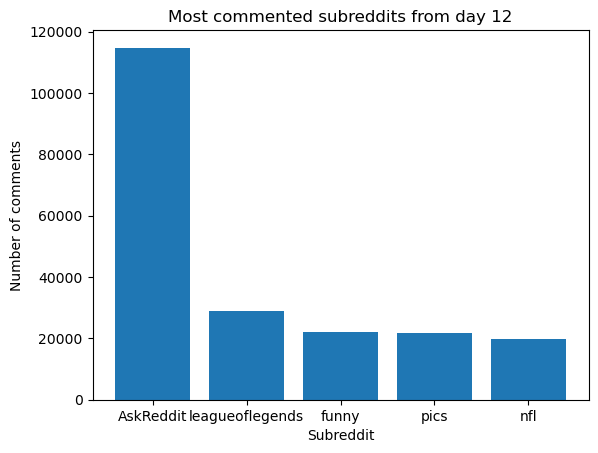

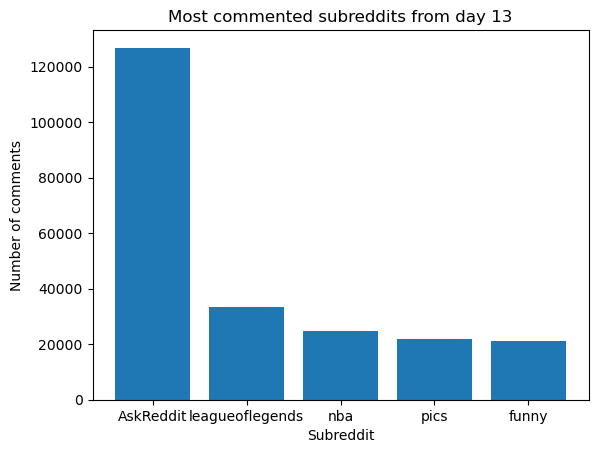

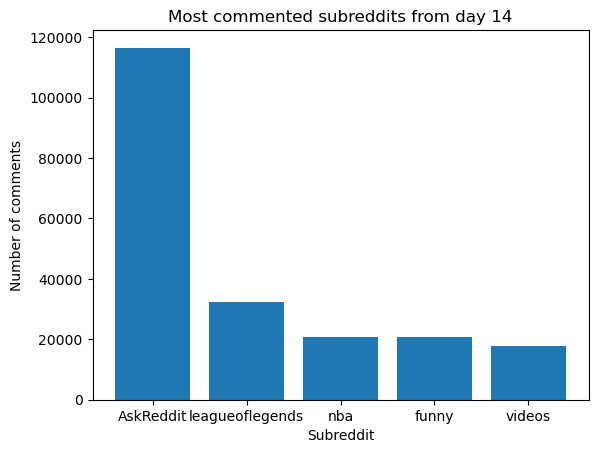

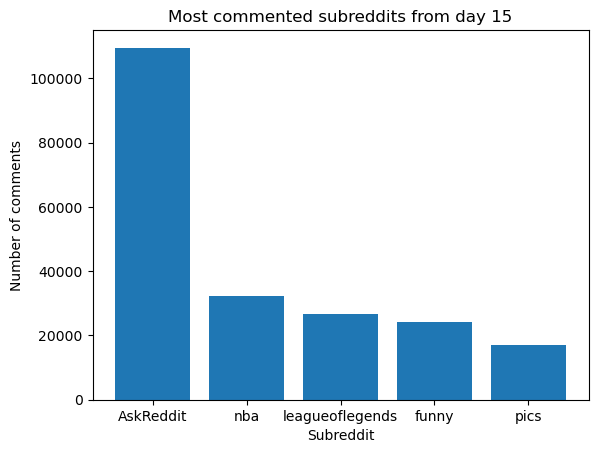

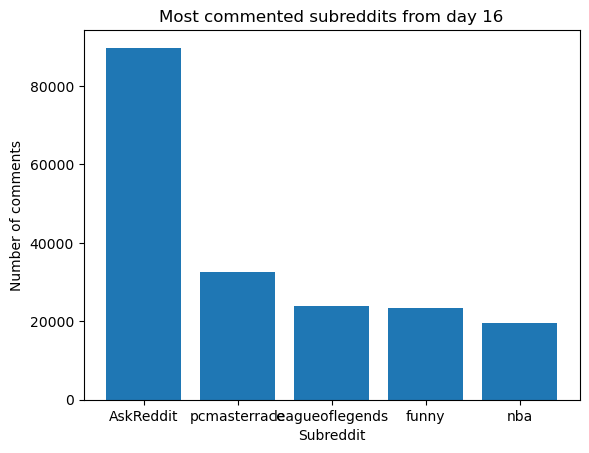

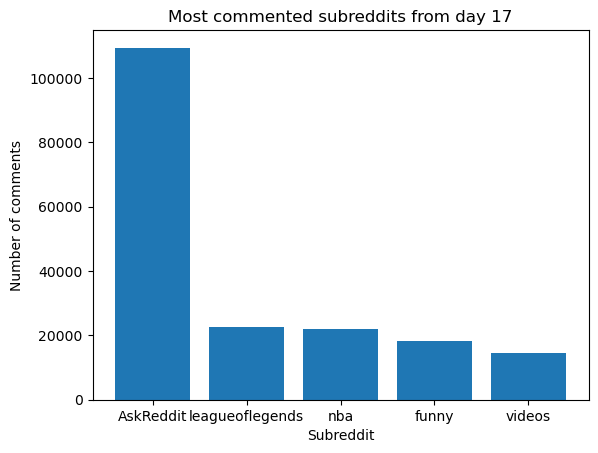

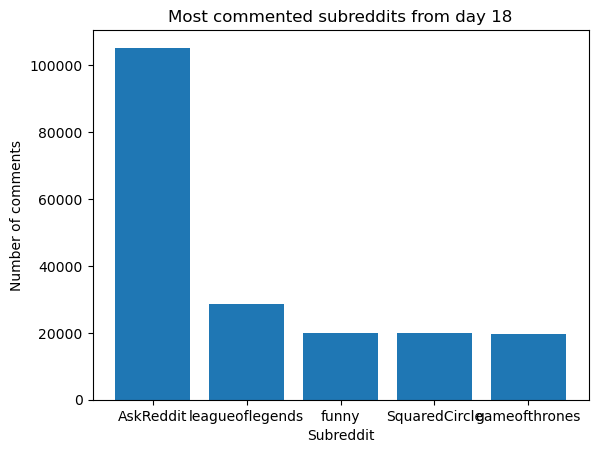

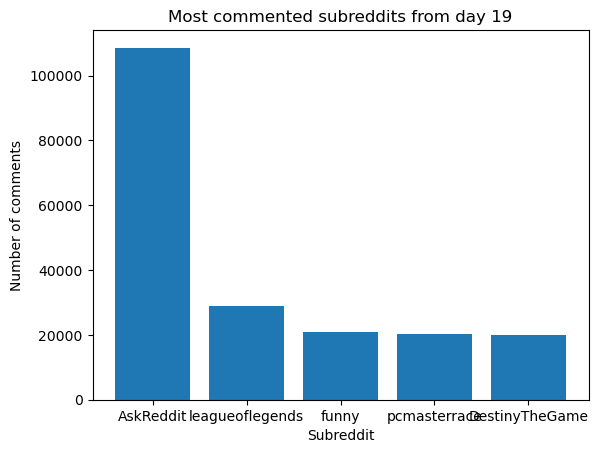

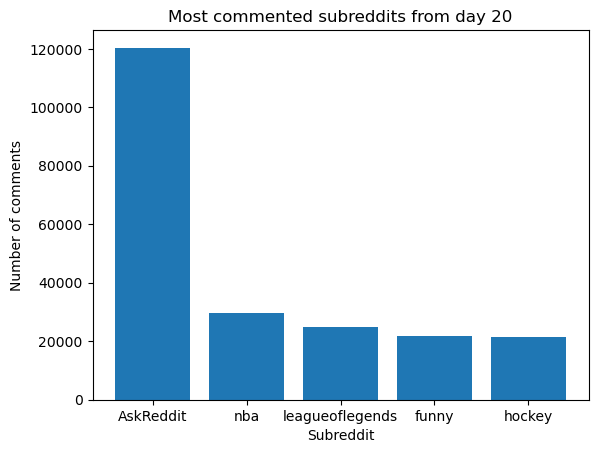

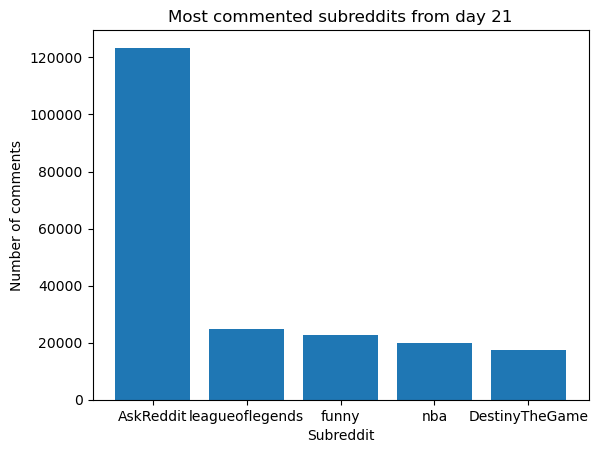

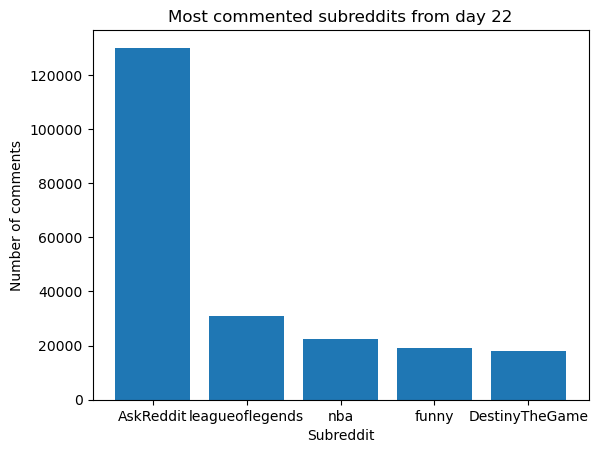

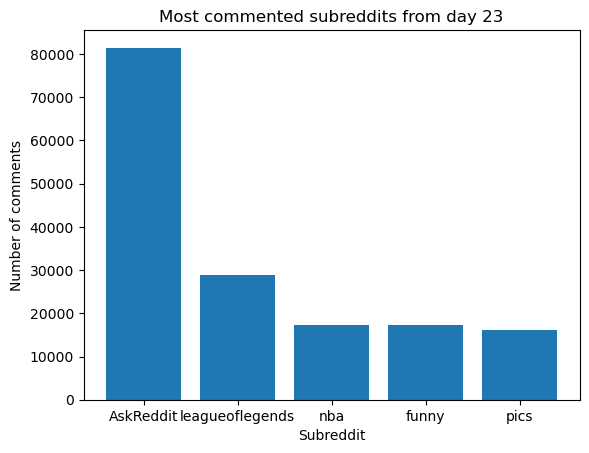

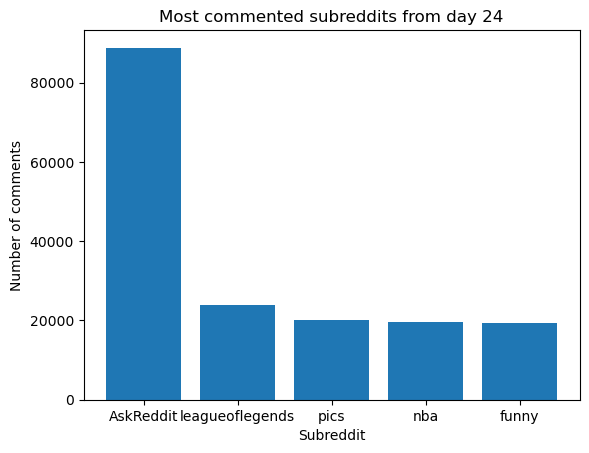

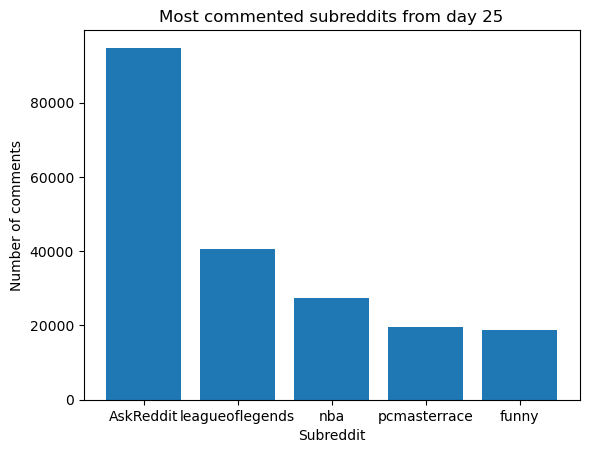

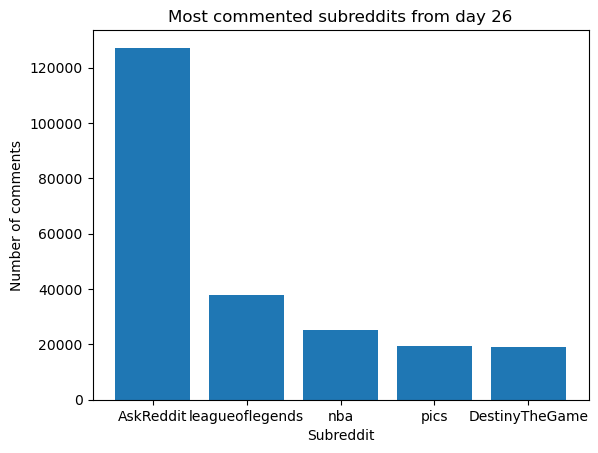

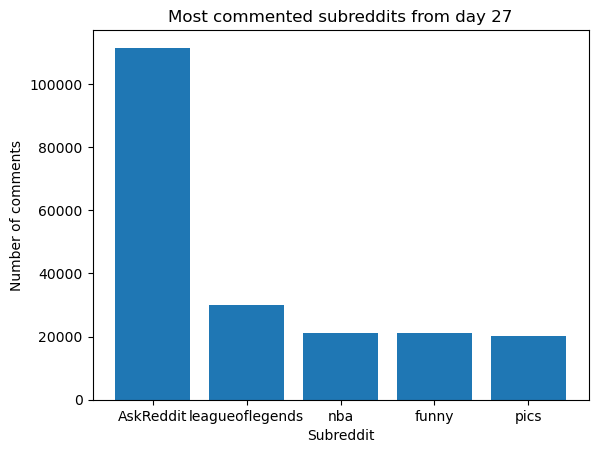

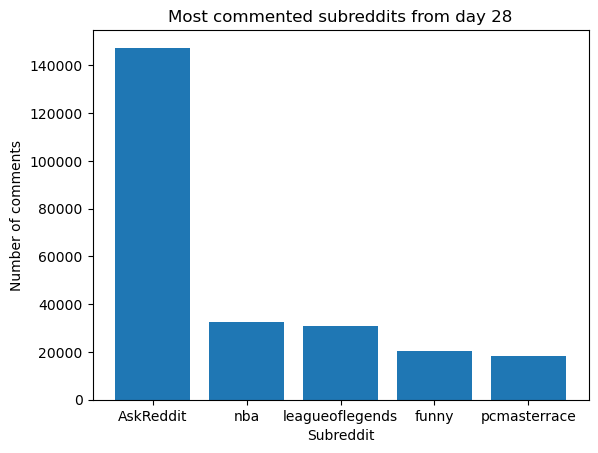

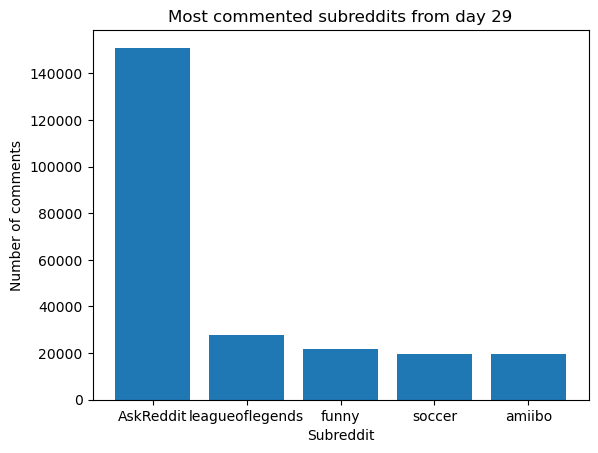

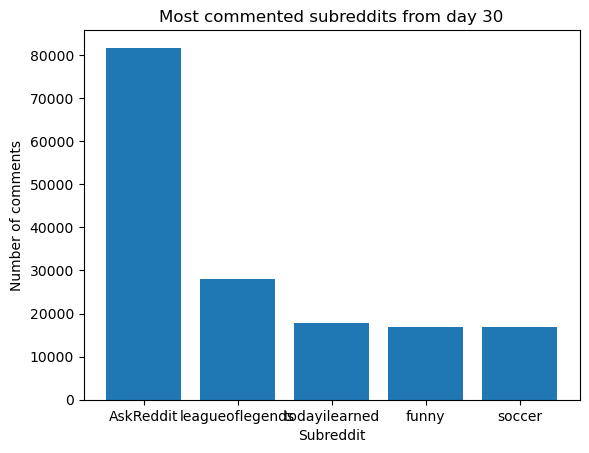

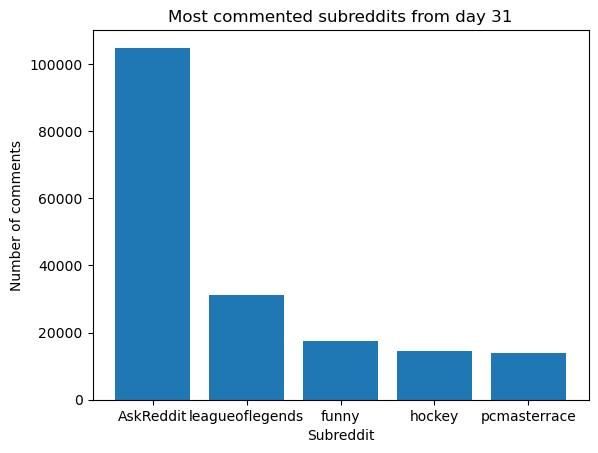

In [20]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

df_copy = df_copy.withColumn("day", df_copy["day"].cast("int"))

plt.figure(figsize=(10, 5))
for day in range(1, 32):
    df_new = df_copy.filter((F.col("day") == day))
    df_new = df_new.orderBy(df_new['count'].desc())
    df_new = df_new.limit(5).toPandas()
    plt.bar(df_new['subreddit'], df_new['count'])
    plt.title(f"Most commented subreddits from day {day}")
    plt.xlabel("Subreddit")
    plt.ylabel("Number of comments")
    plt.show()

## Overall most commented subreddit

In [21]:
df_copy = df
df_copy = df_copy[['subreddit']]
df_copy = df_copy.groupBy('subreddit').count()
df_copy = df_copy.orderBy(df_copy['count'].desc())
df_copy.show(10)

+---------------+-------+
|      subreddit|  count|
+---------------+-------+
|      AskReddit|3390222|
|leagueoflegends| 961563|
|            nba| 658733|
|          funny| 629477|
|           pics| 533357|
|            nfl| 454425|
|   pcmasterrace| 441638|
|         videos| 430697|
|         soccer| 403024|
|  todayilearned| 394296|
+---------------+-------+
only showing top 10 rows



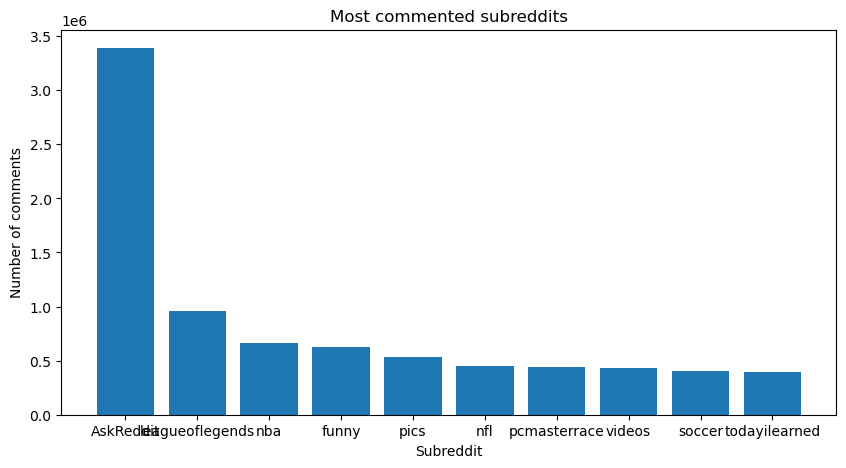

In [22]:
plt.figure(figsize=(10, 5))
df_copy = df_copy.limit(10).toPandas()
plt.bar(df_copy['subreddit'], df_copy['count'])
plt.title("Most commented subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Number of comments")
plt.show()